In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("BankChurners.csv")

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [8]:
df["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [9]:
df["Attrition_Flag"]=df["Attrition_Flag"].map({"Existing Customer":0,"Attrited Customer":0})
df['Attrition_Flag']=df['Attrition_Flag'].astype(int)

In [10]:
df["Gender"].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [11]:
df["Gender"]=df["Gender"].map({"F":0,"M":1}) 
df['Gender']=df['Gender'].astype(int)

In [12]:
df["Education_Level"].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [13]:
df=df[df['Education_Level']!="Unknown"] 
df["Education_Level"]=df["Education_Level"].map({"Graduate":0,"High School":1,"Uneducated":2,"College":3,"Post-Graduate":4,"Doctorate":5})
df['Education_Level']=df['Education_Level'].astype(int)

In [14]:
df["Marital_Status"].value_counts()

Marital_Status
Married     3999
Single      3322
Divorced     652
Unknown      635
Name: count, dtype: int64

In [15]:
df=df[df['Marital_Status']!="Unknown"]
df["Marital_Status"]=df["Marital_Status"].map({"Married":0,"Single":1,"Divorced":2})
df['Marital_Status']=df['Marital_Status'].astype(int)

In [16]:
df["Income_Category"].value_counts()

Income_Category
Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
Unknown            892
$120K +            572
Name: count, dtype: int64

In [17]:
df=df[df['Income_Category']!="Unknown"]
df["Income_Category"]=df["Income_Category"].map({"Less than $40K":0,"$40K - $60K":1,"$80K - $120K":2,"$60K - $80K":3,"$120K +":4})
df['Income_Category']=df['Income_Category'].astype(int)

In [18]:
df["Card_Category"].value_counts()

Card_Category
Blue        6598
Silver       391
Gold          81
Platinum      11
Name: count, dtype: int64

In [19]:
df["Card_Category"]=df["Card_Category"].map({"Blue":0,"Silver":1,"Gold":2,"Platinum":3})
df['Card_Category']=df['Card_Category'].astype(int)

In [20]:
abs(df.corr()["Credit_Limit"].sort_values(ascending=False))

Credit_Limit                                                                                                                          1.000000
Avg_Open_To_Buy                                                                                                                       0.996041
Income_Category                                                                                                                       0.530106
Gender                                                                                                                                0.476471
Card_Category                                                                                                                         0.475312
Total_Trans_Amt                                                                                                                       0.171591
Dependent_count                                                                                                                       0.081379

In [21]:
x,y=df.drop(["Avg_Open_To_Buy","Credit_Limit"],axis=1),df[["Credit_Limit"]]
x=scaler.fit_transform(x)
x.shape

(7081, 21)

In [22]:
def algo_test(x,y):
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
    for algo in algos:
        algo.fit(x_train,y_train)    
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    return result.sort_values('R_Squared', ascending=False)

In [23]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.878623,3187.637995,1643.475051
XGradientBooting,0.876358,3217.249294,1422.588982
Extra Tree,0.797599,4116.305215,1654.555963
Ridge,0.596550,5811.610735,4207.966102
Lasso,0.596334,5813.168760,4206.812666
Linear,0.596144,5814.530593,4209.805458
ElasticNet,0.232004,8018.279377,5922.250288


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [25]:
model=Sequential()
model.add(Dense(252,activation="relu"))
model.add(Dense(252,activation="relu"))
model.add(Dense(252,activation="relu"))
model.add(Dense(252,activation="relu"))
model.add(Dense(252,activation="relu"))
model.add(Dense(252,activation="relu"))
model.add(Dense(252,activation="relu"))
model.add(Dense(252,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [26]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=40)
model.summary()

Epoch 1/40

45/45 [==============================] - 4s 25ms/step - loss: 110204488.0000 - val_loss: 68589344.0000
Epoch 2/40
45/45 [==============================] - 1s 14ms/step - loss: 50292504.0000 - val_loss: 40623704.0000
Epoch 3/40
45/45 [==============================] - 1s 14ms/step - loss: 28299334.0000 - val_loss: 26804868.0000
Epoch 4/40
45/45 [==============================] - 1s 19ms/step - loss: 22311932.0000 - val_loss: 26484528.0000
Epoch 5/40
45/45 [==============================] - 1s 18ms/step - loss: 18656832.0000 - val_loss: 18411930.0000
Epoch 6/40
45/45 [==============================] - 1s 17ms/step - loss: 17203586.0000 - val_loss: 20794008.0000
Epoch 7/40
45/45 [==============================] - 1s 18ms/step - loss: 15336431.0000 - val_loss: 18213024.0000
Epoch 8/40
45/45 [==============================] - 1s 17ms/step - loss: 14922486.0000 - val_loss: 14391131.0000
Epoch 9/40
45/45 [==============================] - 1s 16ms/step - loss: 13401599.0000 - val_l

In [27]:
tahmin=model.predict(x_test)

45/45 [==============================] - 1s 5ms/step


In [28]:
r2_score(tahmin,y_test)

0.8540533235138918

In [29]:
(mean_squared_error(tahmin,y_test))**0.5

3193.2918604560004

In [30]:
numerical_cols = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
categorical_cols = ['Attrition_Flag', 'Gender', 'Dependent_count', 'Marital_Status', 'Education_Level', 'Income_Category', 'Card_Category', 'Total_Relationship_Count',
                    'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

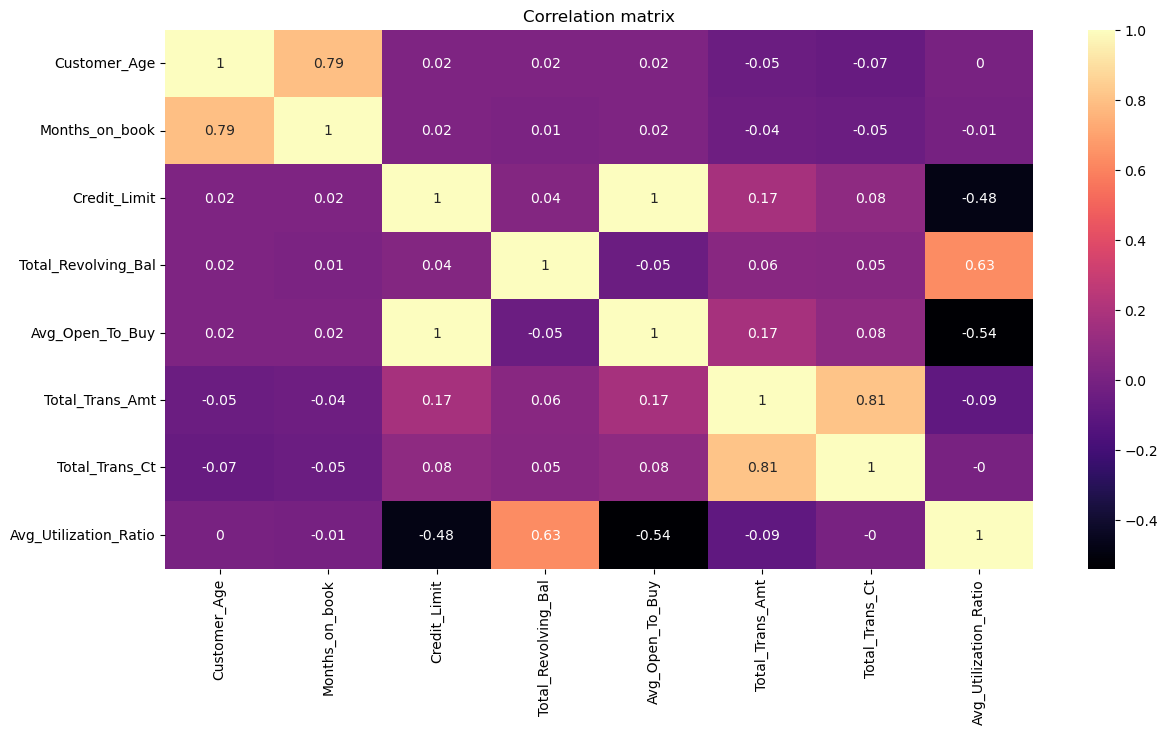

In [31]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
correlation = df[numerical_cols].corr().round(2)
plt.figure(figsize = (14,7));
sns.heatmap(correlation, annot = True, cmap="magma");
plt.title('Correlation matrix');

In [32]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

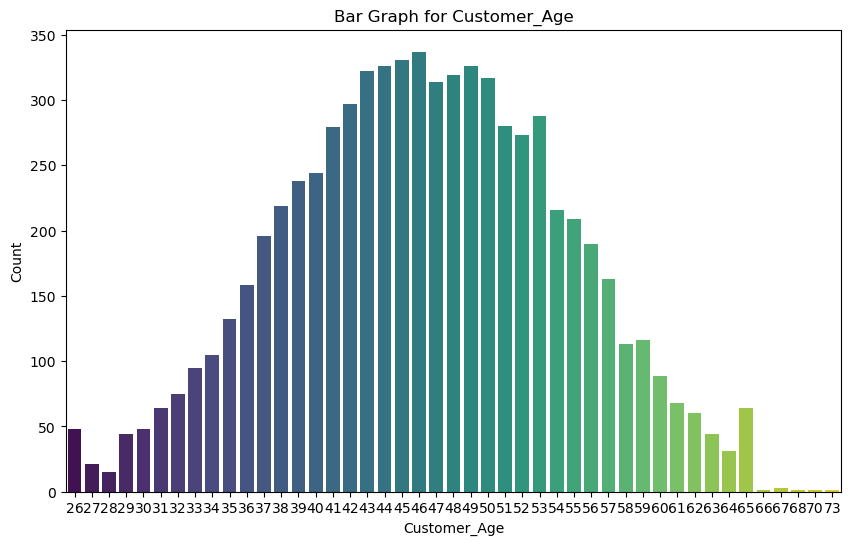

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
selected_col = 'Customer_Age'

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=selected_col, palette='viridis')
plt.xlabel(selected_col)
plt.ylabel('Count')
plt.title(f'Bar Graph for {selected_col}')
plt.show()


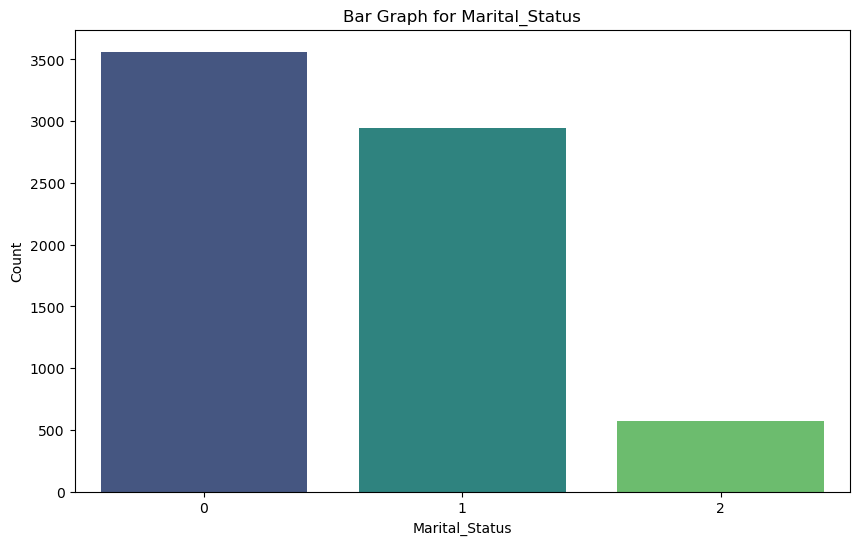

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
selected_col = 'Marital_Status'

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=selected_col, palette='viridis')
plt.xlabel(selected_col)
plt.ylabel('Count')
plt.title(f'Bar Graph for {selected_col}')
plt.show()


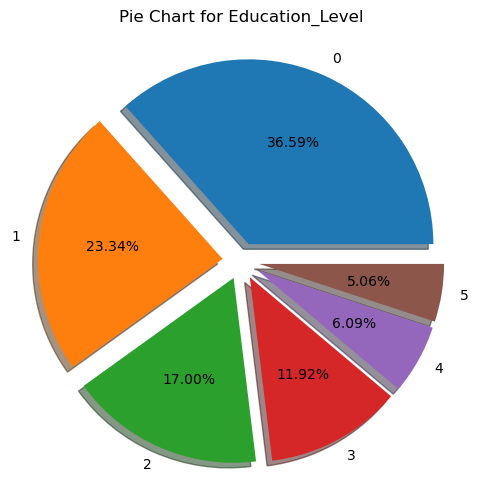

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
pie_col = 'Education_Level'

plt.figure(figsize=(10, 6))
df[pie_col].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1] * len(df[pie_col].unique()), shadow=True)
plt.title(f'Pie Chart for {pie_col}')
plt.ylabel('')
plt.show()


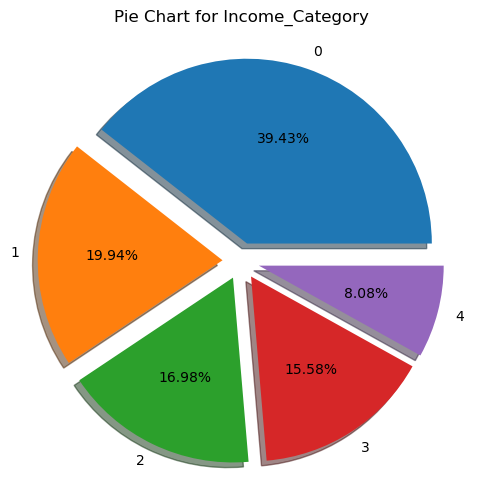

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
pie_col ='Income_Category'

plt.figure(figsize=(10, 6))
df[pie_col].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1] * len(df[pie_col].unique()), shadow=True)
plt.title(f'Pie Chart for {pie_col}')
plt.ylabel('')
plt.show()
